In [4]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [5]:
sim_wd_red = [1.36736, 1.36660, 1.36556, 1.36420, 1.3625, 1.3603, 1.3554]  # drive frequency
sim_devdr_red = [-0.00121, -0.00273, -0.00481, -0.00753, -0.01093, -0.01533, -0.02513]  # deviation by driving
sim_wsb_red = [0.0001082, 0.0002441, 0.0004334, 0.0006784, 0.0009815, 0.001462, 0.002291]  # transition frequency

sim_wd_blue = [5.4375, 5.4318, 5.4238, 5.4131, 5.4002, 5.3843, 5.3460]  # drive frequency
sim_devdr_blue = [-0.00899, -0.02039, -0.03639, -0.05779, -0.08359, -0.11539, -0.19199]  # deviation by driving
sim_wsb_blue = [0.0007594, 0.001719, 0.003103, 0.004899, 0.007200, 0.009999, 0.01812]  # transition frequency

sim_eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]  # driving strength / 2

polydeg = 2
sim_wd_red_cfit = np.polyfit(sim_eps, sim_wd_red, polydeg)
sim_devdr_red_cfit = np.polyfit(sim_eps, sim_devdr_red, polydeg)
sim_wsb_red_cfit = np.polyfit(sim_eps, sim_wsb_red, polydeg)
sim_wd_blue_cfit = np.polyfit(sim_eps, sim_wd_blue, polydeg)
sim_devdr_blue_cfit = np.polyfit(sim_eps, sim_devdr_blue, polydeg)
sim_wsb_blue_cfit = np.polyfit(sim_eps, sim_wsb_blue, polydeg)

In [6]:
meas_wd_blue = [5.4198, 5.4192, 5.4186, 5.41795, 5.4173, 5.4166, 5.4158, 5.4149, 5.4130, 5.4130, 5.41185, 5.41065]
meas_devdr_blue = 2*np.asarray(meas_wd_blue) - (6.811+4.0753)
meas_eps_blue = list()
for i, devdr in enumerate(meas_devdr_blue):
    p = copy(sim_devdr_blue_cfit)
    p[-1] = p[-1] - devdr
    meas_eps_blue.append(max(np.roots(p)))

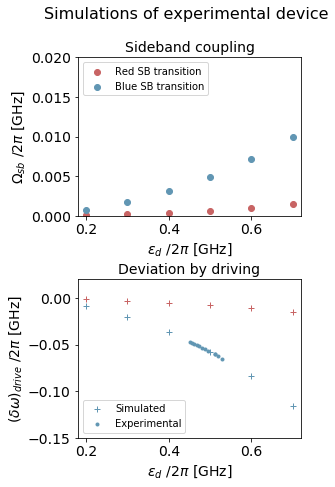

In [7]:
xlim = [0.18, 0.72]

plt.subplots(1, 2, figsize=(4,7))
plt.suptitle("Simulations of experimental device")

plt.subplot(2, 1, 1)
plt.scatter(sim_eps, sim_wsb_red, c=plotcolours['sbred'], label='Red SB transition')
plt.scatter(sim_eps, sim_wsb_blue, c=plotcolours['sbblue'], label='Blue SB transition')

plt.xlim(xlim)
plt.ylim([0, 0.02])
plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}$ $/2\\pi$ [GHz]")
plt.title("Sideband coupling")
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter(sim_eps, sim_devdr_red, c=plotcolours['sbred'], marker=markerstyles['simulated'])
plt.scatter(sim_eps, sim_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['simulated'], label='Simulated')
plt.scatter(meas_eps_blue, meas_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['experimental'], label='Experimental')
# plt.plot(np.linspace(0, 1, 50), np.poly1d(sim_devdr_red_cfit)(np.linspace(0, 1, 50)), c=plotcolours['sbred'])
# plt.plot(np.linspace(0, 1, 50), np.poly1d(sim_devdr_blue_cfit)(np.linspace(0, 1, 50)), c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([-0.15, 0.02])
plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.ylabel("$(\\delta\omega)_{{drive}}$ $/2\\pi$ [GHz]")
plt.title("Deviation by driving")
plt.legend()

plt.subplots_adjust(wspace=0.6)
plt.subplots_adjust(hspace=0.4)
# plt.subplots_adjust(top=0.83)
plt.show()